<a href="https://colab.research.google.com/github/nanobites000/model-training/blob/main/CarData_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, model_selection
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/3RD YEAR/MACHINE LEARNING/car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## Data Exploration and Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df[df.duplicated()]
##?????

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [ ]:
df.isna().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
## dropping car name
df.drop('Car_Name', axis = 1, inplace = True)

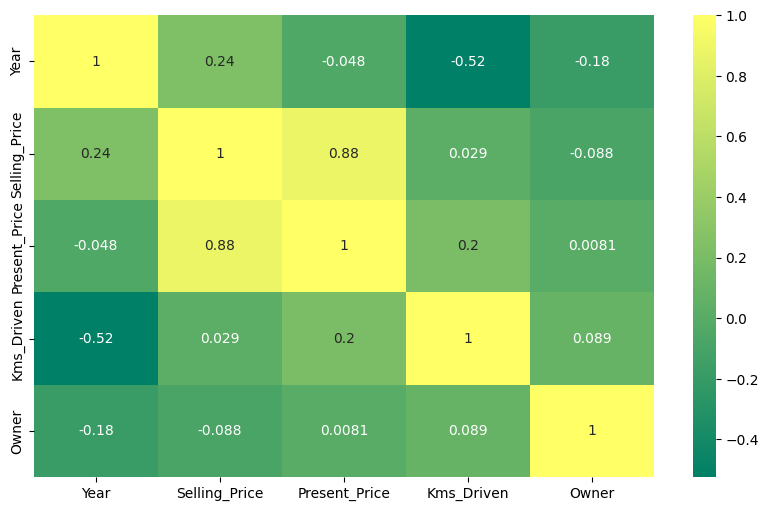

In [ ]:
## checking for correlation
corr_matrix = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']].corr()
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot = True, cmap = "summer")
plt.show()



Conclusion: Drop nothing

In [ ]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


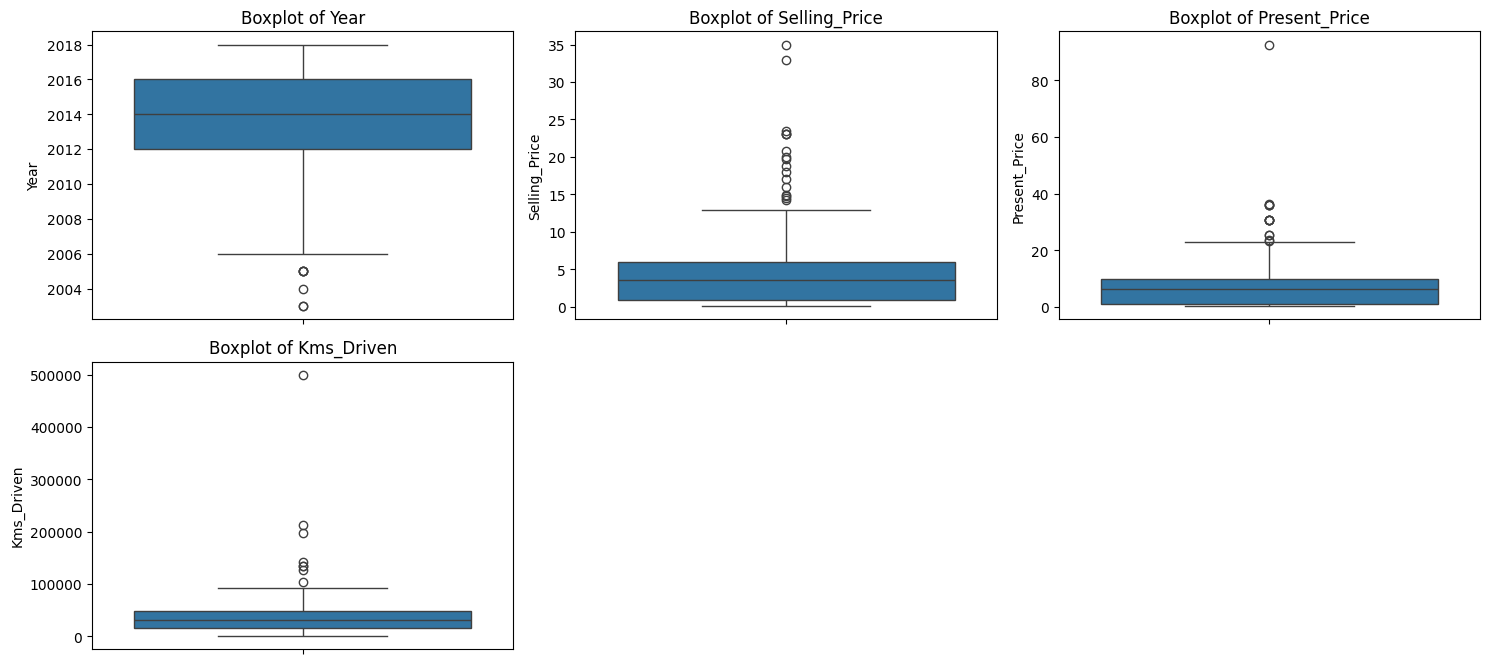

In [ ]:
## Checking for outliers
num_col = ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']
plt.figure(figsize = (15, 10))
for i, column in enumerate(num_col, 1):
  plt.subplot(3, 3, i)
  sns.boxplot(df[column])
  plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

In [ ]:
## reducing the influence of outliers
df['year_log'] = np.log(df['Year'] + 1)
df['selling_price_log'] = np.log(df['Selling_Price'] + 1)
df['present_price_log'] = np.log(df['Present_Price'] + 1)
df['kms_log'] = np.log(df['Kms_Driven'] + 1)

df.drop(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven'], axis = 1, inplace = True)

In [ ]:
## checking size disparity in columns
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


**Model might be biased towards cars that are using Petrol as their fuel type**

In [ ]:
## checking size disparity in columns
df['Transmission'].value_counts()

,count
Transmission,
Manual,261
Automatic,40


**Model might be biased towards cars that are manual**

In [ ]:
## checking size disparity in columns
df['Owner'].value_counts()

,count
Owner,
0,290
1,10
3,1


**Model might be biased towards cars that have no owners**

In [ ]:
## checking size disparity in columns
df['Seller_Type'].value_counts()

,count
Seller_Type,
Dealer,195
Individual,106


**Model might be a little biased towards cars that have dealers**

In [ ]:
## using get_dummies

df = pd.get_dummies(df, columns = ['Fuel_Type', 'Transmission', 'Seller_Type'])

## Model Training using Linear Regression

In [ ]:
## identifying X and y values
X = df.drop('selling_price_log', axis = 1)
y = df['selling_price_log']

In [ ]:
print(X.shape, y.shape)

(301, 11) (301,)


In [ ]:
## splitting train and test values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 9)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred) #r-squared value

In [ ]:
print("Mean Squared Error", mse)
print("RMSE: ", math.sqrt(mse))
print("R-squared Error", r2)

print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

Mean Squared Error 0.025162886370874535
RMSE:  0.15862813864782796
R-squared Error 0.9652239202326213
Coefficients:  [-8.98576295e-02  1.30876338e+02  7.78618152e-01 -3.81942992e-02
 -1.33015259e-01  1.41975237e-01 -8.95997800e-03  9.61347849e-03
 -9.61347848e-03  5.62226592e-02 -5.62226592e-02]
Intercept:  -995.335053660849
